## Logistic Regression Analysis for Start Up Success Prediction

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set()
warnings.filterwarnings('ignore')

In [53]:
startup_data = pd.read_csv('startup_data.csv')

In [54]:
startup_data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [55]:
len(startup_data)

923

In [56]:
startup_data.index

RangeIndex(start=0, stop=923, step=1)

### Overall Population Status

<AxesSubplot:xlabel='status', ylabel='count'>

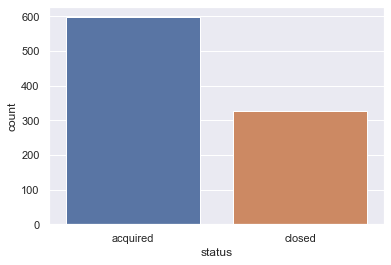

In [57]:
sns.countplot(x='status', data=startup_data)

In [58]:
startup_data.isna()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
919,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
920,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
921,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
startup_data.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

<AxesSubplot:>

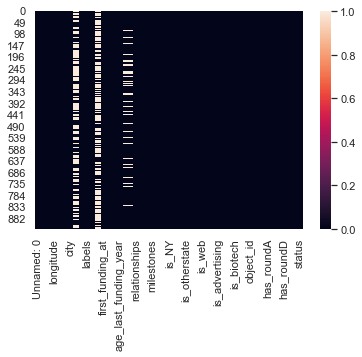

In [60]:
sns.heatmap(startup_data.isna())

In [61]:
startup_data.drop('Unnamed: 0', axis=1, inplace=True)
startup_data.drop('Unnamed: 6', axis=1, inplace=True)


In [62]:

startup_data.head()


,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [63]:
startup_data.drop('closed_at', axis=1, inplace=True)
startup_data["status"] = np.where(startup_data["status"]== 'closed', 0, 1)

In [64]:
startup_data.head()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,first_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,4/1/2009,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,2/14/2005,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,3/30/2010,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,2/17/2005,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [65]:
startup_data["age_first_milestone_year"] = startup_data["age_first_milestone_year"].fillna(method="ffill")
startup_data["age_last_milestone_year"] = startup_data["age_last_milestone_year"].fillna(method="ffill")

startup_data["state_code.1"] = startup_data["state_code.1"].fillna(method="ffill")


In [66]:
startup_data.describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,0.646804,2.235630,3.931456,3.114172,4.820780,7.710726,2.310943,2.541975e+07,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,3.741497,22.394167,0.478222,2.510449,2.967910,2.960720,3.183375,7.265776,1.390922,1.896344e+08,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.498600,3.000000,1.000000,2.725000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.000000,1.446600,3.528800,2.646600,4.569900,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,1.000000,3.575350,5.560250,4.902750,6.852050,10.000000,3.000000,2.472500e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [67]:
startup_data.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'labels', 'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

<AxesSubplot:xlabel='latitude', ylabel='Density'>

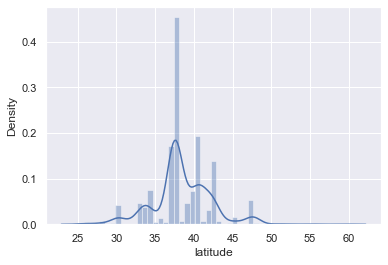

In [68]:
sns.distplot(startup_data['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

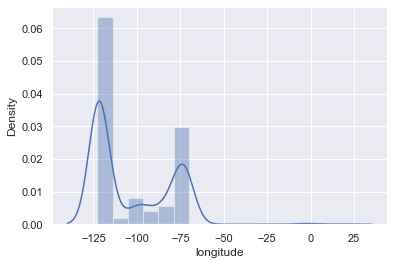

In [69]:
sns.distplot(startup_data['longitude'])

<AxesSubplot:xlabel='relationships', ylabel='Density'>

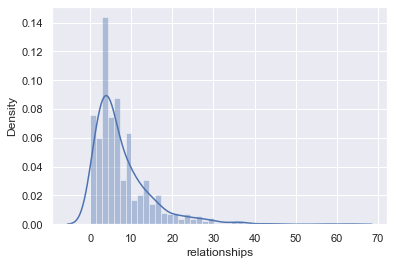

In [70]:
sns.distplot(startup_data['relationships'])

<AxesSubplot:xlabel='funding_total_usd', ylabel='Density'>

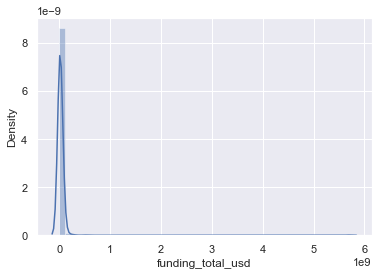

In [71]:
sns.distplot(startup_data['funding_total_usd'])

In [72]:
variate = ['latitude','longitude','relationships','funding_total_usd']
for i in variate:
    startup_data = startup_data[startup_data[i] < startup_data[i].quantile(0.998)]

In [73]:
len(startup_data)

915

In [74]:

y = startup_data['status']
x = startup_data[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'longitude', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel', 
               'age_first_funding_year', 'is_otherstate']]


In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4']
                          )
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.829115e+07,32.347840,-1.808625,2.481145
1,2.143385e+07,-17.159585,-0.460232,6.364997
2,-1.606615e+07,-14.130865,-1.751578,-3.106484
3,2.133385e+07,-17.167262,-4.403211,2.408007
4,-1.736615e+07,-19.048725,-5.143744,-5.128922
...,...,...,...,...
910,-1.756615e+07,-19.203433,2.527241,-3.175595
911,3.333385e+07,34.486945,-8.866284,5.810161
912,2.533385e+07,-17.005731,-4.620400,9.338770
913,-3.166151e+06,-18.529902,4.019205,-3.226019


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(principalDf)
scaled_x = scaler.transform(principalDf)
scaled_x

array([[-0.6731302 ,  1.51696516, -0.27338597,  0.54109917],
       [ 0.78878419, -0.80470572, -0.06956712,  1.38810678],
       [-0.59124827, -0.66267267, -0.26476297, -0.67747577],
       ...,
       [ 0.93230756, -0.79749067, -0.69840475,  2.03664019],
       [-0.11651711, -0.8689673 ,  0.60753005, -0.70354447],
       [ 0.04908679, -0.83983392, -0.633648  ,  0.04128503]])

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.25, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(random_state=0).fit(x_train,y_train)
# lr.predict()
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [79]:
predict = lr.predict(x_test)
predict

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0])

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test,predict)

array([[ 46,  26],
       [ 30, 127]], dtype=int64)

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        72
           1       0.83      0.81      0.82       157

    accuracy                           0.76       229
   macro avg       0.72      0.72      0.72       229
weighted avg       0.76      0.76      0.76       229



In [84]:
lr.score(x_train,y_train)

0.7419825072886297

In [85]:
lr.score(x_test,y_test)

0.7554585152838428

In [86]:
x_pred = x_train[0]
x_pred
res = lr.predict([x_pred])
res[0]


1